<a href="https://colab.research.google.com/github/rakshita-vijay/pytorch/blob/main/pt_004_simple_nn_iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# create a Model class that inherits the nn.Module
class Model(nn.Module):
  # input layer - 4 features of the flower -->
  # hidden_layer1 (a number of neurons) -->
  # hidden_layer2 (a number of neurons) -->
  # output - one of our 3 classes of the iris flower
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    # relu: rectified linear unit
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
# pick a manual seed for randomization
torch.manual_seed(42)
model = Model()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd

In [6]:
# get the data
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [7]:
# change strings in last column to integers
my_df['species'] = my_df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [8]:
# train test slpit ; set x and y
x = my_df.drop('species', axis=1)
y = my_df['species']
x, y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: species, Length: 150, dtype: int64)

In [9]:
x = x.values
y = y.values
x, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# x and y features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# set the criterion of our model to measure the error - how far off the predictions are form the data
criterion = nn.CrossEntropyLoss()

# choose an optimizer and the learning rate - if our error doesn't go down after a bunch of iterations (epochs), we want to lower the learning rate
adam_opti = torch.optim.Adam(model.parameters(), lr=0.01)
# lower the learning rate, longer it takes to train

In [14]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [15]:
# train our model
# epoch: one iteration through our training data
# so, how many epochs?
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(x_train) # get predicted results

  # measure loss/error - going to be high at first
  loss = criterion(y_pred, y_train) # predicted value vs. y_train value

  # keep track of losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i%10 == 0:
    print(f"Epoch: {i} ; loss: {loss}")

  # do some back propagation: take error rate of forward propagation, and feed it back through the network to finetune the weights
  adam_opti.zero_grad()
  loss.backward()
  adam_opti.step()

Epoch: 0 ; loss: 1.0846848487854004
Epoch: 10 ; loss: 0.9183797240257263
Epoch: 20 ; loss: 0.7622429132461548
Epoch: 30 ; loss: 0.6273833513259888
Epoch: 40 ; loss: 0.4667472243309021
Epoch: 50 ; loss: 0.28770601749420166
Epoch: 60 ; loss: 0.1673891693353653
Epoch: 70 ; loss: 0.10598887503147125
Epoch: 80 ; loss: 0.08021354675292969
Epoch: 90 ; loss: 0.06947018206119537


Text(0.5, 0, 'Epoch')

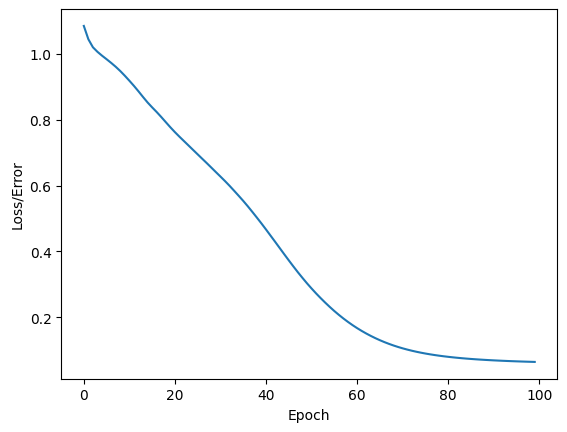

In [16]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')

In [17]:
# evaluate model on test data set (validate model on test set)
test_losses = []

with torch.no_grad(): # turns off back propagation
  y_eval = model.forward(x_test) # x_text are features from test set
  # y_eval is prediction

  test_loss = criterion(y_eval, y_test)

  test_losses.append(test_loss)

In [18]:
test_loss

tensor(0.0634)

In [19]:
correct = 0
wrong = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    # will tell us what type of iris our network thinks it is
    print(f'{i+1}. {str(y_val)} \t --> {y_val.argmax().item()} | {y_test[i]}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
    else:
      wrong += 1

print(f"{correct} correct! <3")
print(f"{wrong} wrong")

1. tensor([-1.4120,  6.3132,  2.6088]) 	 --> 1 | 1
2. tensor([ 8.4023,  2.4573, -7.5391]) 	 --> 0 | 0
3. tensor([-12.1991,   1.1829,  13.7443]) 	 --> 2 | 2
4. tensor([-1.6752,  5.9271,  2.8622]) 	 --> 1 | 1
5. tensor([-1.5887,  6.7559,  2.8371]) 	 --> 1 | 1
6. tensor([ 7.8451,  2.3289, -7.0010]) 	 --> 0 | 0
7. tensor([ 1.1273,  6.0707, -0.0493]) 	 --> 1 | 1
8. tensor([-5.2088,  4.4484,  6.5316]) 	 --> 2 | 2
9. tensor([-3.2614,  4.9128,  4.4788]) 	 --> 1 | 1
10. tensor([0.5683, 6.5565, 0.5445]) 	 --> 1 | 1
11. tensor([-4.3492,  4.7780,  5.6344]) 	 --> 2 | 2
12. tensor([ 7.3631,  2.0552, -6.5497]) 	 --> 0 | 0
13. tensor([ 8.1384,  2.3552, -7.2879]) 	 --> 0 | 0
14. tensor([ 7.4936,  2.1057, -6.6740]) 	 --> 0 | 0
15. tensor([ 7.8643,  2.2491, -7.0269]) 	 --> 0 | 0
16. tensor([-1.3322,  6.5325,  2.5448]) 	 --> 1 | 1
17. tensor([-8.2712,  2.4244,  9.6406]) 	 --> 2 | 2
18. tensor([0.3374, 6.4826, 0.7657]) 	 --> 1 | 1
19. tensor([-1.5909,  5.7677,  2.7565]) 	 --> 1 | 1
20. tensor([-8.1891,  2.